In [3]:
import cv2
import matplotlib.pyplot as plt

# Motion Detection

In [13]:
capture = cv2.VideoCapture("./video.mp4")

frame_width = int(capture.get(3)) 
frame_height = int(capture.get(4)) 

size = (frame_width, frame_height) 

result = cv2.VideoWriter(
    'video_motion.avi',  
    cv2.VideoWriter_fourcc(*'MJPG'),
    10, size)

_, first_frame = capture.read()
first_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
first_frame = cv2.GaussianBlur(first_frame, (21, 21), 0)

while True:
    ret, frame = capture.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(21,21), 0)

    difference = cv2.absdiff(first_frame, gray)
    threshold = cv2.threshold(difference, 25, 255, cv2.THRESH_BINARY)[1]


    # Apply morphological operations to reduce noise and fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    fgmask = cv2.erode(threshold, kernel, iterations=2)
    fgmask = cv2.dilate(threshold, kernel, iterations=2)

    contours, hierachy = cv2.findContours(fgmask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) < 10000:
            continue

        (x, y, w, h) = cv2.boundingRect(contour) # get Bouding box 
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)

    result.write(frame)
    cv2.imwrite("./image_of_results.png", frame)
    # cv2.imshow("Video Stream", frame)
    key = cv2.waitKey(1)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()

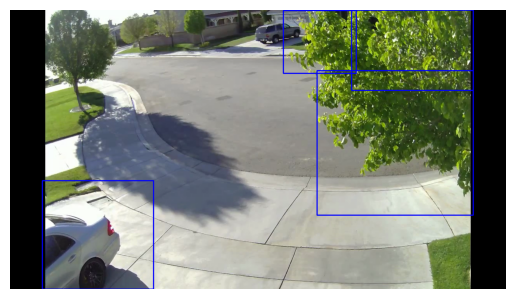

In [14]:
img = cv2.imread("./image_of_results.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

# Image Stitching

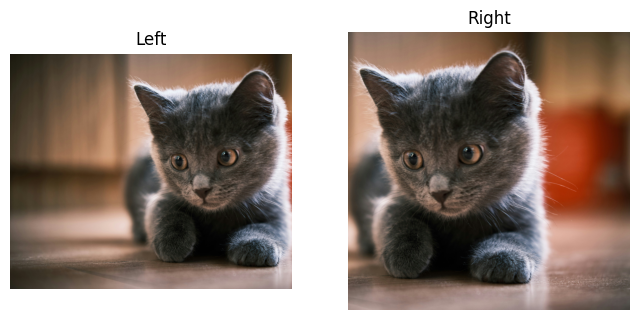

In [15]:
img1 = cv2.imread('meotrai.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('meophai.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize=(8,10))
ax[0].imshow(img1)
ax[0].set_title('Left')
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].set_title('Right')
ax[1].axis('off')
plt.show()


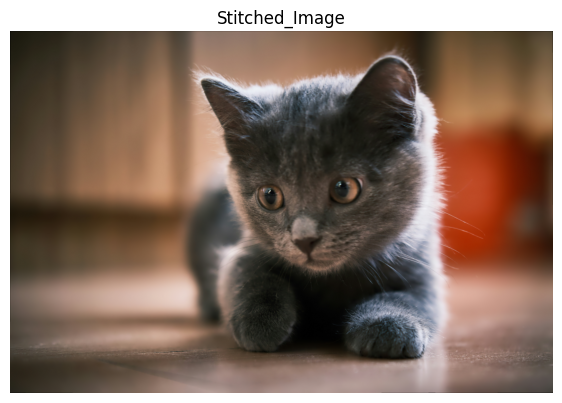

In [16]:
stitcher = cv2.Stitcher_create()
status, stitched_img = stitcher.stitch((img1, img2))
if status == cv2.Stitcher_OK:
    ## Display the stitched image:
    plt.figure(figsize=(7,5))
    plt.imshow(stitched_img)
    plt.title("Stitched_Image")
    plt.axis("off")
    plt.show()
elif status == cv2.Stitcher_ERR_NEED_MORE_IMGS:
    print('Not enough images for stitching')
elif status == cv2.Stitcher_ERR_HOMOGRAPHY_EST_FAIL:
    print('Homography estimation failed')
else:
    print('Image stitching failed')